In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [2]:
source = '/Users/HQ/blue/reza/abc/data/seq143'
os.chdir(source)

In [3]:
x = np.load('bpsvnp.npy')

In [4]:
x = x.reshape(7500000, 9)
x = pd.DataFrame(x)
features = ['Shift', 'Slide', 'Rise', 'Tilt', 'Roll', 'Twist', 'Zp', 'Bend', 'Total Bend']
x.columns = features
x = x.values
x = StandardScaler().fit_transform(x)

feat_cols = ['feature'+str(i) for i in range(x.shape[1])]
normalized = pd.DataFrame(x,columns=feat_cols)

pca_bpsv = PCA(n_components=9)
principalComponents = pca_bpsv.fit_transform(x)

principal_bpsv_df = pd.DataFrame(data = principalComponents)
print('Explained variation per principal component: {}'.format(pca_bpsv.explained_variance_ratio_))

Explained variation per principal component: [0.20203472 0.15542882 0.14111108 0.12966672 0.1089871  0.10138181
 0.06827435 0.04914735 0.04396806]


<Figure size 432x288 with 0 Axes>

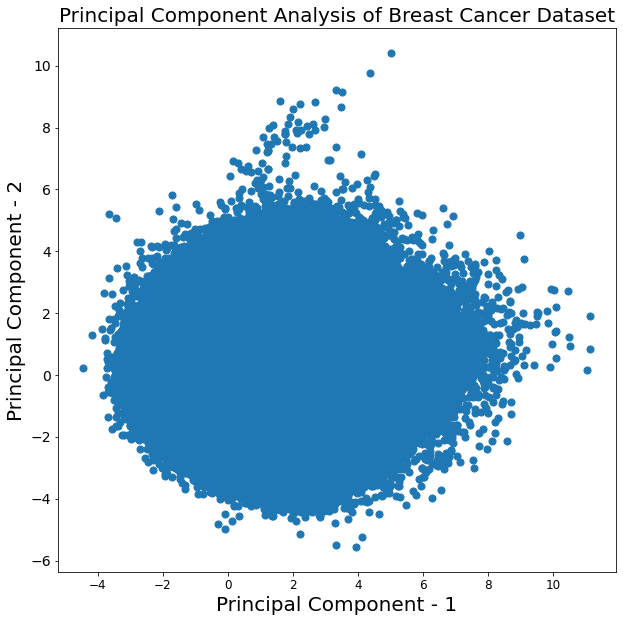

In [53]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('1',fontsize=20)
plt.ylabel('2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = ['Benign', 'Malignant']
colors = ['r', 'g']
# for target, color in zip(targets,colors):
#     indicesToKeep = breast_dataset['label'] == target
plt.scatter(principal_bpsv_df[principal_bpsv_df.columns[0]]
            , principal_bpsv_df[principal_bpsv_df.columns[1]], s = 50)

# plt.legend(targets,prop={'size': 15})


<Figure size 432x288 with 0 Axes>

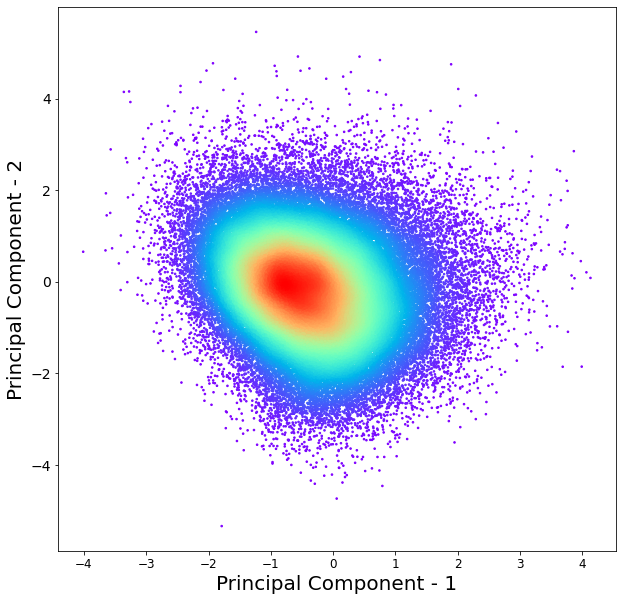

In [8]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
# plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = ['Benign', 'Malignant']
colors = ['r', 'g']

j = principal_bpsv_df[principal_bpsv_df.columns[1]][::100]
y = principal_bpsv_df[principal_bpsv_df.columns[2]][::100]
    # x = [i for i in raw[raw.columns[1+(10*i)]][100000:105000] if i != 0.000]
    # y = [i for i in raw[raw.columns[2+(10*i)]][100000:105000] if i != 0.000]
    # if len(x) != 0:
jy = np.vstack([j,y])
z = gaussian_kde(jy)(jy)
plt.scatter(j, y, c=z, s=10, marker='.', cmap='rainbow')

# plt.scatter(principal_bpsv_df[principal_bpsv_df.columns[1]]
#             , principal_bpsv_df[principal_bpsv_df.columns[2]], s = 50)

# plt.legend(targets,prop={'size': 15})
plt.savefig('bpsv-1vs2-100th.png', dpi=300, bbox_inches='tight')


In [7]:
principal_bpsv_df[principal_bpsv_df.columns[1]].shape

(7500000,)